In [1]:
import os

os.getcwd()

'/home/fidae/Desktop/Desarrollos Fidae/miapca/examples'

In [2]:
os.chdir('../src')

In [3]:
from MIAPCA import MIAPCA
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

/home/fidae/Desktop/Desarrollos Fidae/miapca/venv/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


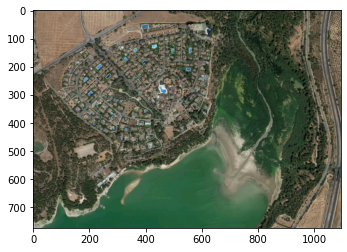

In [4]:
pca = MIAPCA('../data/Cubillas.jpg')

pca.read_image()

pca.plot_image()

In [6]:
pca.batchwise(1)

pca.extended_image.shape

(843796, 27)

In [7]:
pca.reduce(3)

/home/fidae/Desktop/Desarrollos Fidae/miapca/src/utils.py:135: RuntimeWarning: invalid value encountered in sqrt
  comprobacion = np.abs(np.sqrt(t_sum-t_previo_sum))


Algorithm converged in 147 iterations
[0.8192304831936237, 0.8647975794956708, 0.9094747046377613]


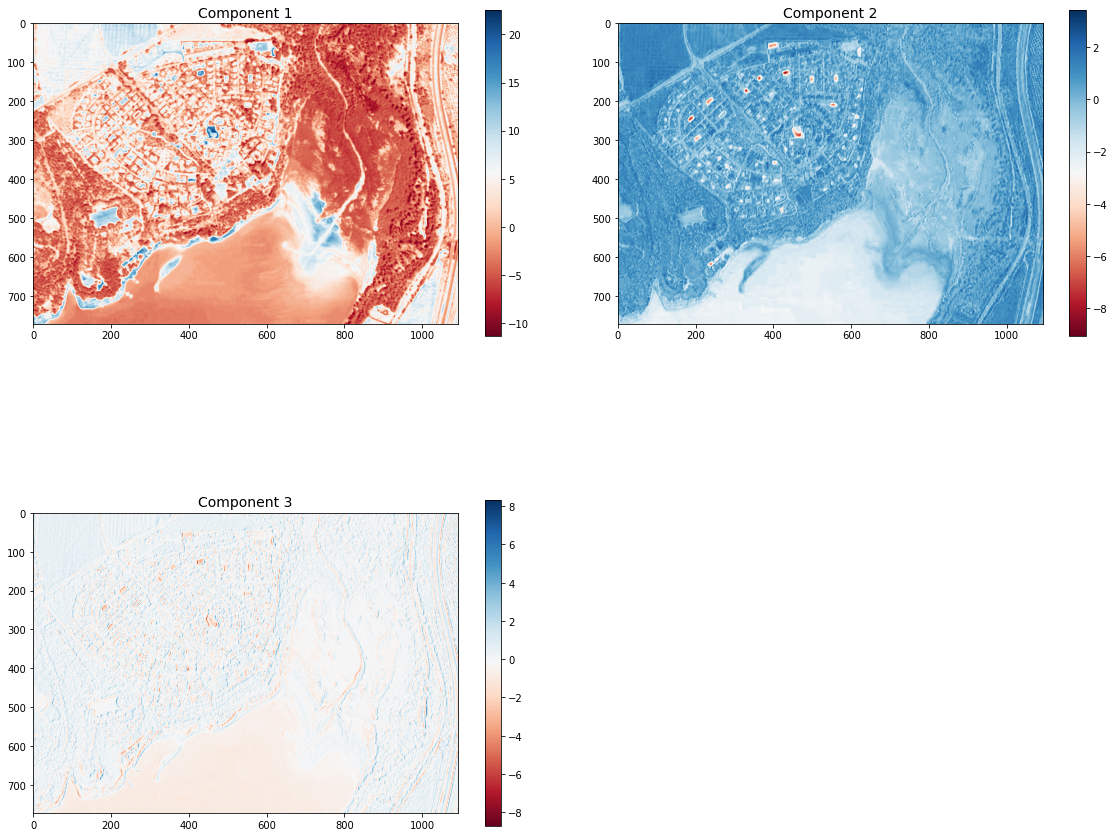

In [8]:
pca.score_map()

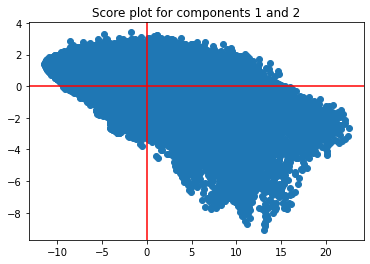

In [10]:
pca.scatter_scores(0, 1)

In [26]:
def show_results(mask):
    score_plot = np.reshape(mask, newshape=(pca.new_rows, pca.new_columns))

    fig, ax =  plt.subplots(figsize=(20, 10))

    im = ax.imshow(score_plot, cmap=plt.get_cmap('binary'))
    #show(pca.image)
    fig.colorbar(im, ax=ax)
    ax.set_title("Dummy image for the selected features")

    plt.show()

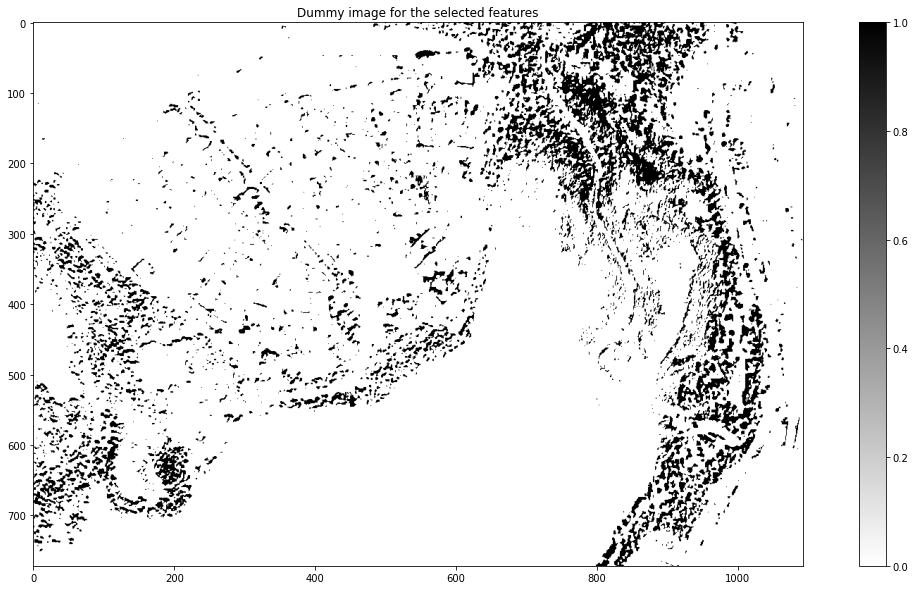

In [28]:
mask = np.where((pca.scores[:,0]<-5) & (pca.scores[:,1]>0), 1, 0)

show_results(mask)

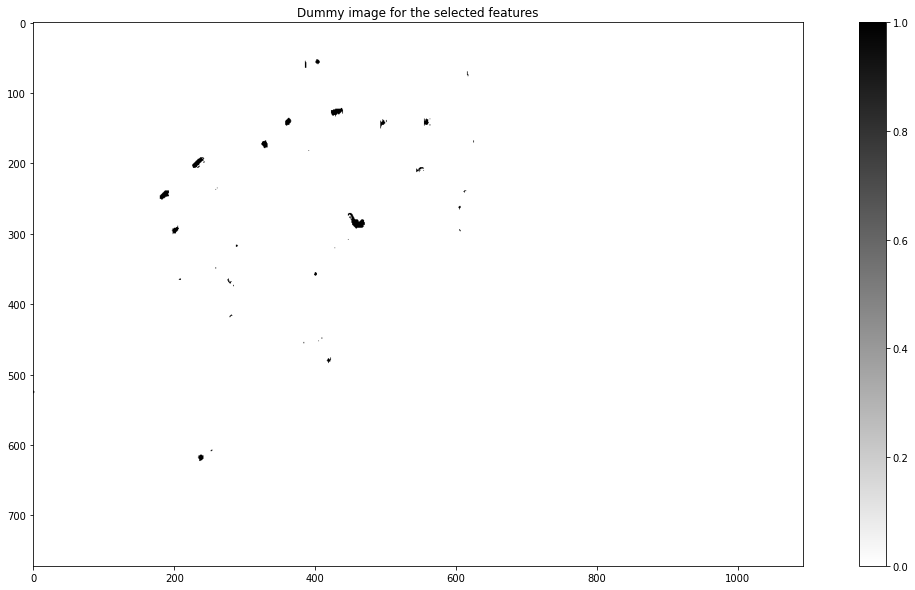

In [27]:
mask = np.where((pca.scores[:,0]>5) & (pca.scores[:,1]<-4), 1, 0)

show_results(mask)

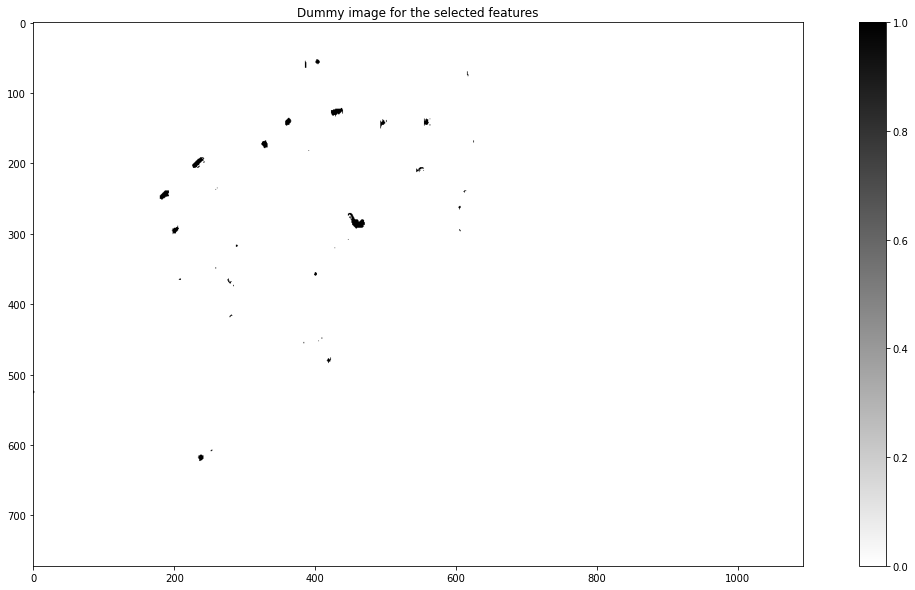

In [29]:
mask = np.where((pca.scores[:,0]>5) & (pca.scores[:,1]<-4), 1, 0)


show_results(mask)

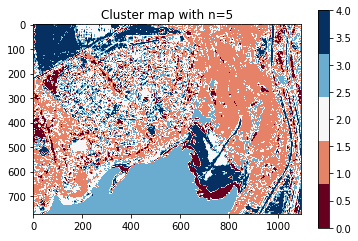

In [31]:
pca.clusters(5)